# Method Metrics
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [Neo4j Python Driver](https://neo4j.com/docs/api/python-driver/current)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from neo4j import GraphDatabase

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename))
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## Effective Method Line Count

### Table 1a - Effective method line count distribution

This table shows the distribution of the effective method line count per artifact.
For each artifact the number of methods with effective line count = 1,2,3,... is shown to get an overview of how line counts are distributed over methods.

Only the 15 artifacts with the highest method count and their effective method line count distribution (limited by 40)is shown here. The whole table can be found in the CSV report `Effective_Method_Line_Count_Distribution`.

Have a look below to find out which packages and methods have the highest effective lines of code.

In [8]:
effective_method_line_count_distribution_max_artifacts=20

effective_method_line_count_distribution=query_cypher_to_data_frame("../cypher/Overview/Effective_Method_Line_Count_Distribution.cypher")
effective_method_line_count_distribution=effective_method_line_count_distribution.pivot(index='effectiveLineCount', columns='artifactName', values='methods')

# Fill missing values with zero
effective_method_line_count_distribution.fillna(0, inplace=True)

# Convert to integer
effective_method_line_count_distribution=effective_method_line_count_distribution.astype(int)

# Sort by column sum and then take only the first 10 columns
effective_method_line_count_sum_per_artifact = effective_method_line_count_distribution.sum()
effective_method_line_count_distribution = effective_method_line_count_distribution[effective_method_line_count_sum_per_artifact.sort_values(ascending=False).index[:effective_method_line_count_distribution_max_artifacts]]

effective_method_line_count_distribution.head(40)

artifactName,axon-messaging-4.10.0.jar,axon-eventsourcing-4.10.0.jar,axon-modelling-4.10.0.jar,axon-test-4.10.0.jar,axon-configuration-4.10.0.jar,axon-disruptor-4.10.0.jar
effectiveLineCount,,,,,,
1,2827,573,532,281,310,84
2,827,204,158,171,146,31
3,670,127,141,65,34,30
4,271,64,57,49,42,8
5,220,39,45,24,16,5
6,161,34,45,18,17,6
7,103,32,24,20,3,2
8,80,12,10,11,7,0
9,78,18,17,10,8,4


### Table 1b - Effective method line count distribution (normalized)

The table shown here only includes the first 40 rows which typically represents the most significant entries.
Have a look below to find out which packages and methods have the highest effective lines of code.

In [9]:
# Divide every value by the sum of all values in the same column to get vertical normalized values.
effective_method_line_count_distribution_normalized = effective_method_line_count_distribution.div(effective_method_line_count_distribution.sum(axis=0), axis=1).multiply(100)
effective_method_line_count_distribution_normalized.head(40)

artifactName,axon-messaging-4.10.0.jar,axon-eventsourcing-4.10.0.jar,axon-modelling-4.10.0.jar,axon-test-4.10.0.jar,axon-configuration-4.10.0.jar,axon-disruptor-4.10.0.jar
effectiveLineCount,,,,,,
1,51.456134,50.175131,49.396472,40.142857,51.155116,45.652174
2,15.052785,17.863398,14.670381,24.428571,24.092409,16.847826
3,12.195122,11.120841,13.091922,9.285714,5.610561,16.304348
4,4.932654,5.604203,5.292479,7.000000,6.930693,4.347826
5,4.004368,3.415061,4.178273,3.428571,2.640264,2.717391
6,2.930470,2.977233,4.178273,2.571429,2.805281,3.260870
7,1.874772,2.802102,2.228412,2.857143,0.495050,1.086957
8,1.456134,1.050788,0.928505,1.571429,1.155116,0.000000
9,1.419731,1.576182,1.578459,1.428571,1.320132,2.173913


### Table 1b Chart 1 - Effective method line count distribution (normalized)

<Figure size 640x480 with 0 Axes>

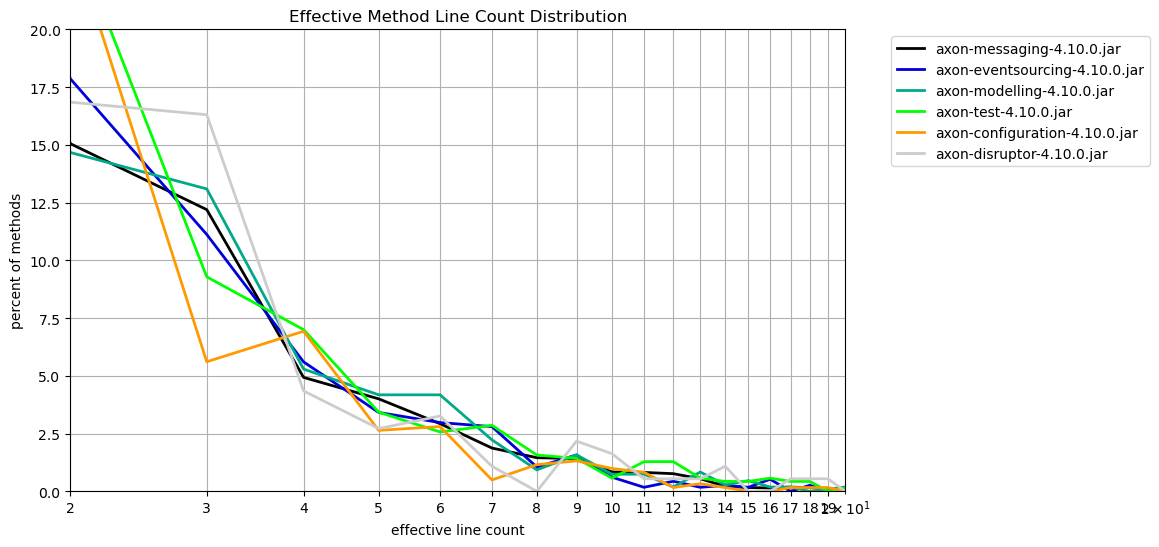

In [10]:
if effective_method_line_count_distribution_normalized.empty:
    print("No data to plot")
else:
    plot.figure();
    method_line_count_x_ticks=range(1,20)
    axes = effective_method_line_count_distribution_normalized.head(20).plot(
        kind='line',
        logx=True,
        grid=True,
        xlim=[2, 20],
        ylim=[0, 20],
        xticks=method_line_count_x_ticks,
        title='Effective Method Line Count Distribution', 
        xlabel='effective line count',
        ylabel='percent of methods',
        cmap=main_color_map,
        figsize=(10, 6),
        lw=2,
    )
    axes.set_xticklabels(method_line_count_x_ticks)
    axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plot.show()

### Table 1c - Top 30 packages with highest effective line counts

The following table shows the top 30 packages with the highest effective lines of code. The whole table can be found in the CSV report `Effective_lines_of_method_code_per_package`.

In [11]:
# Query artifacts and packages and find the method with the highest effective lines of code and cyclomatic complexity
# The result of this query will be also used further below. 
method_statistics_per_package = query_cypher_to_data_frame("../cypher/Overview/Effective_lines_of_method_code_per_package.cypher")

In [12]:
# Select and order the columns for this particular table 
effective_line_count_per_package=method_statistics_per_package[['artifactName', 'fullPackageName', 'linesInPackage', 'methodCount', 'maxLinesMethod','maxLinesMethodName']]

# Print out the top 30 (head) rows
effective_line_count_per_package.head(30)

,artifactName,fullPackageName,linesInPackage,methodCount,maxLinesMethod,maxLinesMethodName
0,axon-messaging-4.10.0,org.axonframework.eventhandling,2331,838,64,processBatch
1,axon-configuration-4.10.0,org.axonframework.config,1587,606,50,<init>
2,axon-messaging-4.10.0,org.axonframework.eventhandling.pooled,1041,341,77,run
3,axon-test-4.10.0,org.axonframework.test.aggregate,956,252,45,appendEventOverview
4,axon-messaging-4.10.0,org.axonframework.queryhandling,935,384,36,doQuery
5,axon-messaging-4.10.0,org.axonframework.eventhandling.deadletter.jdbc,849,249,31,convertToLetter
6,axon-modelling-4.10.0,org.axonframework.modelling.command,824,329,17,lambda$initializeHandler$7
7,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.eventstore,712,264,21,peekPrivateStream
8,axon-messaging-4.10.0,org.axonframework.messaging.annotation,670,239,23,<init>
9,axon-modelling-4.10.0,org.axonframework.modelling.command.inspection,637,218,26,inspectFieldsAndMethods


### Table 1d - Top 30 methods with the highest effective line count

The following table shows the top 30 methods with the highest effective lines of code. The whole table can be found in the CSV report `Effective_lines_of_method_code_per_package`.

In [13]:
# Select and order the columns for this particular table 
effective_line_count_method_per_package=method_statistics_per_package[['artifactName', 'fullPackageName', 'maxLinesMethodType', 'maxLinesMethodName', 'maxLinesMethod', 'linesInPackage']]

# Sort by the maximum of effective lines of code per package descending
effective_line_count_method_per_package=effective_line_count_method_per_package.sort_values(by='maxLinesMethod', ascending=False)

# Reset the index to the new sort order
effective_line_count_method_per_package=effective_line_count_method_per_package.reset_index()

# Print out the top 30 (head) rows
effective_line_count_method_per_package.head(30)

,index,artifactName,fullPackageName,maxLinesMethodType,maxLinesMethodName,maxLinesMethod,linesInPackage
0,2,axon-messaging-4.10.0,org.axonframework.eventhandling.pooled,Coordinator$CoordinationTask,run,77,1041
1,0,axon-messaging-4.10.0,org.axonframework.eventhandling,TrackingEventProcessor,processBatch,64,2331
2,19,axon-messaging-4.10.0,org.axonframework.commandhandling.gateway,CommandGatewayFactory,createGateway,50,488
3,1,axon-configuration-4.10.0,org.axonframework.config,DefaultConfigurer,<init>,50,1587
4,3,axon-test-4.10.0,org.axonframework.test.aggregate,Reporter,appendEventOverview,45,956
5,35,axon-messaging-4.10.0,org.axonframework.deadline.quartz,DeadlineJob,execute,44,245
6,24,axon-modelling-4.10.0,org.axonframework.modelling.saga.repository.jdbc,JdbcSagaStore,updateSaga,38,374
7,4,axon-messaging-4.10.0,org.axonframework.queryhandling,SimpleQueryBus,doQuery,36,935
8,30,axon-messaging-4.10.0,org.axonframework.messaging.deadletter,InMemorySequencedDeadLetterQueue,process,33,298
9,25,axon-messaging-4.10.0,org.axonframework.messaging.unitofwork,BatchingUnitOfWork,executeWithResult,32,363


## Cyclomatic Complexity

### Table 2a - Cyclomatic method complexity distribution

This table shows the distribution of the cyclomatic complexity of methods per artifact.
For each artifact the number of methods with the cyclomatic complexity = 1,2,3,... is shown to get an overview of how cyclomatic complexity is distributed over methods.

Only the 15 artifacts with the highest method count sum and their cyclomatic method complexity distribution (limited by 40) is shown here. The whole table can be found in the CSV report `Cyclomatic_Method_Complexity_Distribution`.

Have a look below to find out which packages and methods have the highest effective lines of code.

In [14]:
cyclomatic_method_complexity_distribution_max_artifacts=15

cyclomatic_method_complexity_distribution=query_cypher_to_data_frame("../cypher/Overview/Cyclomatic_Method_Complexity_Distribution.cypher")
cyclomatic_method_complexity_distribution=cyclomatic_method_complexity_distribution.pivot(index='cyclomaticComplexity', columns='artifactName', values='methods')

# Fill missing values with zero
cyclomatic_method_complexity_distribution.fillna(0, inplace=True)

# Convert to integer
cyclomatic_method_complexity_distribution=cyclomatic_method_complexity_distribution.astype(int)

# Sort by column sum and then take only the first 10 columns
effective_method_line_count_sum_per_artifact = effective_method_line_count_distribution.sum()
cyclomatic_method_complexity_distribution = cyclomatic_method_complexity_distribution[effective_method_line_count_sum_per_artifact.sort_values(ascending=False).index[:cyclomatic_method_complexity_distribution_max_artifacts]]

cyclomatic_method_complexity_distribution.head(40)

artifactName,axon-messaging-4.10.0.jar,axon-eventsourcing-4.10.0.jar,axon-modelling-4.10.0.jar,axon-test-4.10.0.jar,axon-configuration-4.10.0.jar,axon-disruptor-4.10.0.jar
cyclomaticComplexity,,,,,,
1,4425,943,895,521,542,146
2,460,94,75,61,37,20
3,284,53,38,60,17,5
4,141,24,29,22,5,4
5,74,9,24,13,3,3
6,46,4,10,9,0,2
7,20,7,2,4,2,2
8,12,7,1,3,0,2
9,7,0,2,1,0,0


### Table 2b - Cyclomatic method complexity distribution (normalized)

The table shown here only includes the first 40 rows which typically represents the most significant entries.
Have a look below to find out which packages and methods have the highest effective lines of code.

In [15]:
# Divide every value by the sum of all values in the same column to get vertical normalized values.
cyclomatic_method_complexity_distribution_normalized = cyclomatic_method_complexity_distribution.div(cyclomatic_method_complexity_distribution.sum(axis=0), axis=1).multiply(100)
cyclomatic_method_complexity_distribution_normalized.head(40)

artifactName,axon-messaging-4.10.0.jar,axon-eventsourcing-4.10.0.jar,axon-modelling-4.10.0.jar,axon-test-4.10.0.jar,axon-configuration-4.10.0.jar,axon-disruptor-4.10.0.jar
cyclomaticComplexity,,,,,,
1,80.542410,82.574431,83.101207,74.428571,89.438944,79.347826
2,8.372770,8.231173,6.963788,8.714286,6.105611,10.869565
3,5.169276,4.640981,3.528319,8.571429,2.805281,2.717391
4,2.566436,2.101576,2.692665,3.142857,0.825083,2.173913
5,1.346924,0.788091,2.228412,1.857143,0.495050,1.630435
6,0.837277,0.350263,0.928505,1.285714,0.000000,1.086957
7,0.364033,0.612960,0.185701,0.571429,0.330033,1.086957
8,0.218420,0.612960,0.092851,0.428571,0.000000,1.086957
9,0.127412,0.000000,0.185701,0.142857,0.000000,0.000000


### Table 2b Chart 1 - Cyclomatic method complexity distribution (normalized)

<Figure size 640x480 with 0 Axes>

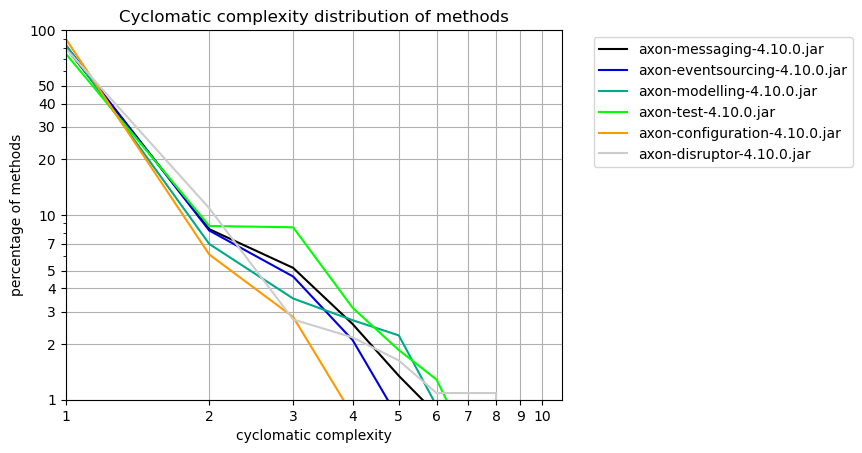

In [16]:
if cyclomatic_method_complexity_distribution_normalized.empty:
    print("No data to plot")
else:
    plot.figure();
    method_line_count_x_ticks=range(1,11)
    cyclomatic_complexity_y_ticks=[1, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 100]
    axes = cyclomatic_method_complexity_distribution_normalized.plot(
        kind='line', 
        logx=True,
        logy=True,
        grid=True,
        xlim=[1,11],
        ylim=[1,100],
        xticks=method_line_count_x_ticks,
        yticks=cyclomatic_complexity_y_ticks,
        title='Cyclomatic complexity distribution of methods', 
        xlabel='cyclomatic complexity',
        ylabel='percentage of methods',
        cmap=main_color_map,
    )
    axes.set_xticklabels(method_line_count_x_ticks)
    axes.set_yticklabels(cyclomatic_complexity_y_ticks)
    axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plot.show()

### Table 2c - Top 30 packages with highest cyclomatic complexity

The following table shows the top 30 packages with the highest cyclomatic complexity. The whole table can be found in the CSV report `Effective_lines_of_method_code_per_package`.

In [17]:
# Select and order the columns for this particular table 
cyclomatic_complexity_per_package=method_statistics_per_package[['artifactName', 'fullPackageName', 'complexityInPackage', 'methodCount', 'maxComplexity','maxComplexityMethod']]

# Sort by the method with the highest cyclomatic complexity per package descending
cyclomatic_complexity_per_package=cyclomatic_complexity_per_package.sort_values(by='complexityInPackage', ascending=False)

# Print out the top 30 (head) rows
cyclomatic_complexity_per_package.head(30)

,artifactName,fullPackageName,complexityInPackage,methodCount,maxComplexity,maxComplexityMethod
0,axon-messaging-4.10.0,org.axonframework.eventhandling,1276,838,21,processBatch
1,axon-configuration-4.10.0,org.axonframework.config,716,606,7,getFactoryForType
4,axon-messaging-4.10.0,org.axonframework.queryhandling,480,384,11,doQuery
2,axon-messaging-4.10.0,org.axonframework.eventhandling.pooled,460,341,23,run
6,axon-modelling-4.10.0,org.axonframework.modelling.command,445,329,9,resolveTarget
3,axon-test-4.10.0,org.axonframework.test.aggregate,438,252,13,ensureValuesEqual
7,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.eventstore,397,264,13,hasNext
8,axon-messaging-4.10.0,org.axonframework.messaging.annotation,386,239,14,handle
9,axon-modelling-4.10.0,org.axonframework.modelling.command.inspection,339,218,9,prepareHandlers
10,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing,325,251,8,doScheduleSnapshot


### Table 2d - Top 30 methods with highest cyclomatic complexity

The following table shows the top 30 packages containing the methods with the highest cyclomatic complexity. The whole table can be found in the CSV report `Effective_lines_of_method_code_per_package`.

In [18]:
# Select and order the columns for this particular table 
cyclomatic_complexity_per_method=method_statistics_per_package[['artifactName', 'fullPackageName', 'maxComplexityType', 'maxComplexityMethod', 'maxComplexity']]

# Sort by the method with the highest cyclomatic complexity per package descending
cyclomatic_complexity_per_method=cyclomatic_complexity_per_method.sort_values(by='maxComplexity', ascending=False)

# Reset the index to the new sort order
cyclomatic_complexity_per_method=cyclomatic_complexity_per_method.reset_index()

# Print out the top 30 (head) rows
cyclomatic_complexity_per_method.head(30)

,index,artifactName,fullPackageName,maxComplexityType,maxComplexityMethod,maxComplexity
0,51,axon-messaging-4.10.0,org.axonframework.eventhandling.scheduling.job...,JobRunrEventScheduler,$deserializeLambda$,40
1,2,axon-messaging-4.10.0,org.axonframework.eventhandling.pooled,Coordinator$CoordinationTask,run,23
2,0,axon-messaging-4.10.0,org.axonframework.eventhandling,TrackingEventProcessor,processBatch,21
3,32,axon-modelling-4.10.0,org.axonframework.modelling.saga.repository,AssociationValueMap$AssociationValueComparator,compare,16
4,15,axon-messaging-4.10.0,org.axonframework.eventhandling.deadletter.jpa,DeadLetterEventEntry,equals,15
5,8,axon-messaging-4.10.0,org.axonframework.messaging.annotation,AnnotatedMessageHandlingMember,handle,14
6,7,axon-eventsourcing-4.10.0,org.axonframework.eventsourcing.eventstore,ConcatenatingDomainEventStream,hasNext,13
7,52,axon-messaging-4.10.0,org.axonframework.commandhandling.distributed....,CommandNameFilter,$deserializeLambda$,13
8,47,axon-messaging-4.10.0,org.axonframework.deadline.jobrunr,JobRunrDeadlineManager,$deserializeLambda$,13
9,3,axon-test-4.10.0,org.axonframework.test.aggregate,AggregateTestFixture,ensureValuesEqual,13
